# Analysis of cousera dataset

In [105]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from matplotlib.ticker import FuncFormatter

In [106]:
df = pd.read_csv('/Users/alex/Downloads/Project3/coursea_data.csv')
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


# Data cleaning

Remove unneccesary column

In [107]:
df = df.drop('Unnamed: 0', axis=1)

In [108]:
df.shape

(891, 6)

Check for duplicates

In [109]:
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print(f"There {'is' if len(duplicate_rows) == 1 else 'are'} {len(duplicate_rows)} duplicate row{'' if len(duplicate_rows) == 1 else 's'}.")
else:
    print("There are no duplicate rows.")

There are no duplicate rows.


Check for missing values

In [110]:
df.isnull().any()

course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

Check for data type

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.9+ KB


The column 'course_students_enrolled' is categorical and should be converted to numerical to proceed the analysis.

Check the  strings data in course_students_enrolled column on variability of strings.

In [112]:
unique_students_enrolled = sorted(df['course_students_enrolled'].unique())
contains_period = [value for value in unique_students_enrolled if '.' in str(value)]
contains_comma = [value for value in unique_students_enrolled if ',' in str(value)]
if not contains_period:
    contains_period = 'No strings with period'
if not contains_comma:
    contains_comma = 'No strings with comma'
print("Strings containing a period:")
print(contains_period)
print("\nStrings containing a comma:")
print(contains_comma)

Strings containing a period:
['1.3m', '1.5k', '1.5m', '1.6k', '1.7k', '1.8k', '1.9k', '2.2k', '2.3k', '2.4k', '2.5m', '2.6k', '2.9k', '3.2k', '3.2m', '3.3k', '3.4k', '3.5k', '3.6k', '3.8k', '3.9k', '4.1k', '4.2k', '4.4k', '4.5k', '4.8k', '4.9k', '5.2k', '5.3k', '5.4k', '5.5k', '5.6k', '5.8k', '5.9k', '6.1k', '6.2k', '6.3k', '6.4k', '6.5k', '6.6k', '6.8k', '7.1k', '7.2k', '7.3k', '7.4k', '7.6k', '7.7k', '7.8k', '7.9k', '8.1k', '8.2k', '8.4k', '8.5k', '8.7k', '8.8k', '8.9k', '9.1k', '9.2k', '9.4k', '9.5k', '9.7k', '9.8k', '9.9k']

Strings containing a comma:
No strings with comma


Convert strings to float format in course_students_enrolled column

In [113]:
def value_to_float(x):
    if isinstance(x, float):
        return x
    x = x.lower().replace(',', '').strip()
    if 'k' in x:
        return float(x.replace('k', '')) * 1000
    if 'm' in x:
        return float(x.replace('m', '')) * 1000000
    return float(x)
df['course_students_enrolled'] = df['course_students_enrolled'].apply(value_to_float)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


Check for numeric and cateogorial data type

In [114]:
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled    float64
dtype: object

Evaluation of distinct values in each column

In [115]:
df.nunique()

course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

Find course titles that appear more than once, since unique number of course_tittle less than total rows

In [116]:
duplicate_titles = df[df.duplicated(subset='course_title', keep=False)]
duplicate_titles = duplicate_titles.sort_values(by='course_title')
duplicate_titles

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000.0
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000.0
563,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000.0
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
582,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81000.0
583,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39000.0


### Data normalization

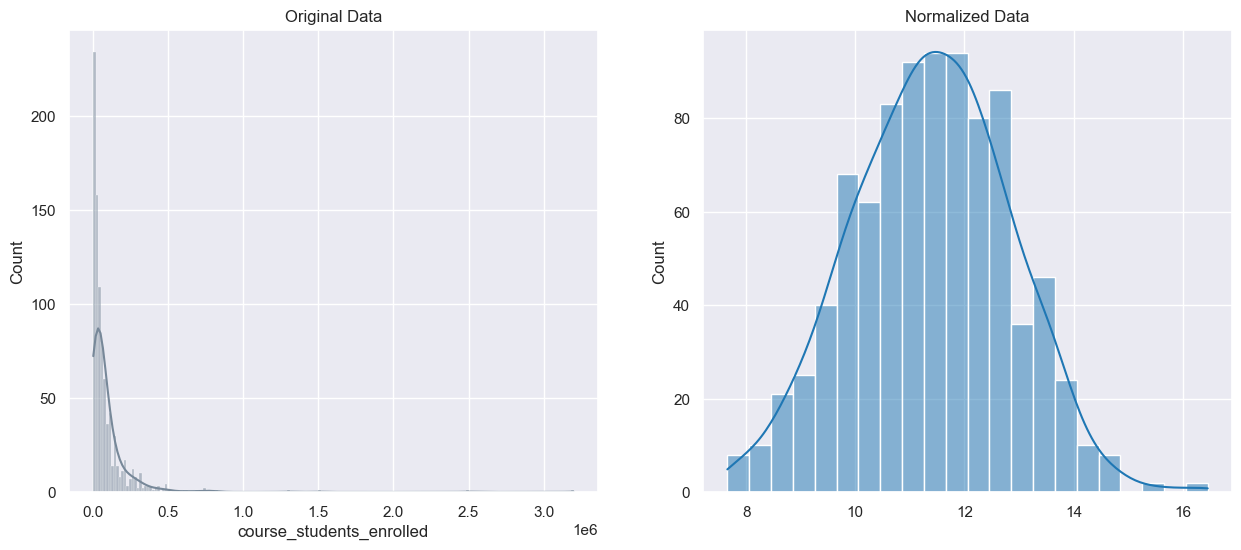

In [117]:
original_data = df['course_students_enrolled']
normalized_data = stats.boxcox(original_data + 1) 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False, color='lightslategrey')
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False, color='#1F77B4')
ax[1].set_title("Normalized Data")
plt.show()

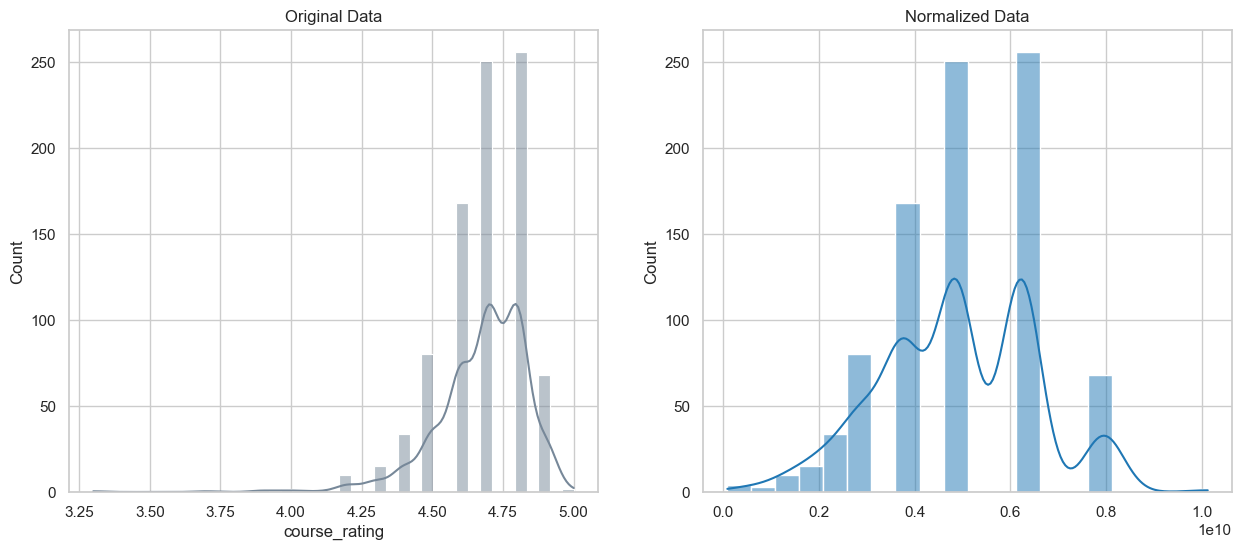

In [167]:
original_data_rating = df['course_rating']
normalized_data_rating = stats.boxcox(original_data_rating + 1)  
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(original_data_rating, ax=ax[0], kde=True, legend=False, color='lightslategrey')
ax[0].set_title("Original Data")
sns.histplot(normalized_data_rating[0], ax=ax[1], kde=True, legend=False, color='#1F77B4')
ax[1].set_title("Normalized Data")
plt.show() 

The data on course ratings is  not notmally distributed.

### Treating the outliers in numeric columns

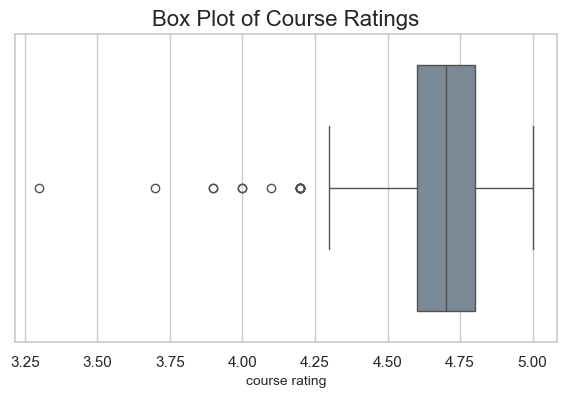

In [157]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['course_rating'], color='lightslategrey')
plt.title('Box Plot of Course Ratings', fontsize=16)
plt.xlabel('course rating', fontsize=10)
plt.show()

List of outliers based on course rating

In [120]:
Q1 = df['course_rating'].quantile(0.25)
Q3 = df['course_rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['course_rating'] < lower_bound) | (df['course_rating'] > upper_bound)]
outliers_sorted = outliers.sort_values(by='course_rating')
outliers_sorted

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
413,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000.0
566,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29000.0
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76000.0
569,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15000.0
598,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.0,Intermediate,33000.0
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13000.0
414,How to Start Your Own Business,Michigan State University,SPECIALIZATION,4.1,Beginner,34000.0
445,Instructional Design Foundations and Applications,University of Illinois at Urbana-Champaign,COURSE,4.2,Mixed,12000.0
515,Introduction to Spreadsheets and Models,University of Pennsylvania,COURSE,4.2,Mixed,76000.0
844,Unity XR: How to Build AR and VR Apps,Unity,SPECIALIZATION,4.2,Beginner,12000.0


Outliers in students enrolled column

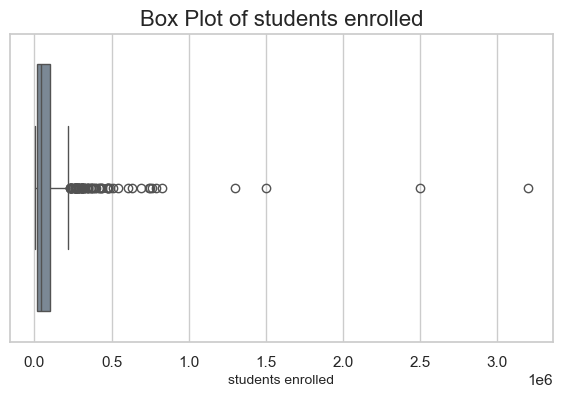

In [158]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['course_students_enrolled'], color='lightslategrey')
plt.title('Box Plot of students enrolled', fontsize=16)
plt.xlabel('students enrolled', fontsize=10)
plt.show()

Course ratings between 3.3 and 4.2 considered as outliers, at the same time, column number of students has a significant number of outliers. However, for current analysis outliers has not been removed, because they may provide valuable insights into underlying patterns or anomalies that could be critical for a comprehensive understanding of the data.

# Exploratory Data Analysis

### Descriptive statistics of numeric columns

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_rating,891.0,4.677329,0.162225,3.3,4.6,4.7,4.8,5.0
course_students_enrolled,891.0,90552.076319,181936.453852,1500.0,17500.0,42000.0,99500.0,3200000.0


Coursera provides 891 courses with average rating of 4.68. On average 90.5k students enrolled at a single course.

Courses by number of students

In [ ]:
total_students_enrolled = df['course_students_enrolled'].sum()
print(f"Total students enrolled: {total_students_enrolled / 1e6:.2f} million")

Total students enrolled: 80.68 million


### Distribution of courses by ratings

In [123]:
fig = px.histogram(df, x='course_rating', color_discrete_sequence=['#1F77B4'], nbins=20)
fig.update_layout(
    title={
        'text': 'Distribution of courses by ratings',
        'y':0.95, 
        'x':0.5,   
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 22}  
    },
    xaxis_title='Course rating',
    yaxis_title='Number of courses',
    template='plotly_white',
    width=800,
    height=500)

fig.show()

The course ratings on Coursera range from 3.3 to 5.0. The majority of courses, over 50 in each bin, fall within the 4.5 to 4.9 range. The most common rating is 4.8, with 256 courses achieving this score

### Courses by difficulty level

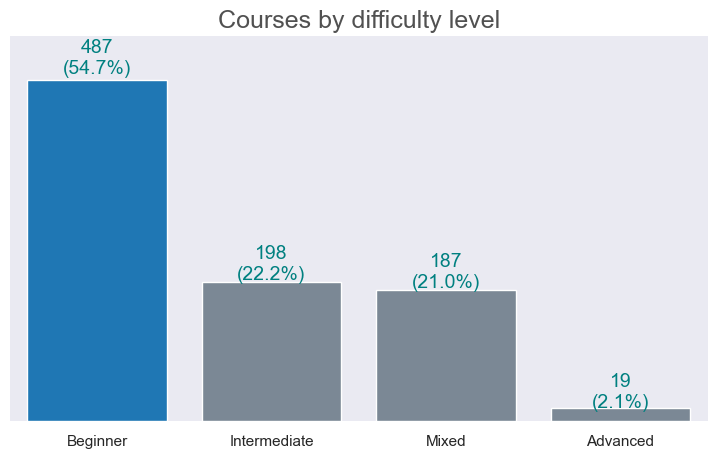

In [208]:
plt.figure(figsize=(9, 5))
bars = sns.countplot(x='course_difficulty', data=df, color='lightslategrey')
bars.patches[0].set_facecolor('#1F77B4')
plt.title("Courses by difficulty level", fontsize=18, alpha=0.8)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.ylim(0, 550)
total = len(df)
for bar in bars.patches:
    height = bar.get_height()
    percentage = f"{height / total * 100:.1f}%"
    label = f"{int(height)}\n({percentage})"  # Convert count to whole number
    plt.gca().text(bar.get_x() + bar.get_width() / 2, height + height * 0.02, label,
               ha='center', color='teal', fontsize=14)
plt.show()

More than half of the courses offered on Coursera, specifically 54.7%, are designed for beginners. Intermediate and mixed-level courses account for 22.2% and 21% respectively, each representing a significant portion of the catalog. In contrast, advanced-level courses constitute just 2.1% of the total offerings.

Courses offered in each category

In [176]:
total_students_by_difficulty = df.groupby('course_difficulty')['course_students_enrolled'].sum().sort_values()
total_students = total_students_by_difficulty.sum()
percentage_of_total = total_students_by_difficulty / total_students * 100
total_students_with_percentage = total_students_by_difficulty.to_frame(name='Total Students')
total_students_with_percentage['Percentage of Total'] = percentage_of_total.apply(lambda x: f"{x:.2f}%")
total_students_with_percentage['Total Students'] = total_students_with_percentage['Total Students'].apply(lambda x: f"{x / 1e6:.2f} million")
print("Total students enrolled by course difficulty:")
print(total_students_with_percentage)

Total students enrolled by course difficulty:
                  Total Students Percentage of Total
course_difficulty                                   
Advanced            1.26 million               1.57%
Intermediate       14.51 million              17.98%
Mixed              24.99 million              30.97%
Beginner           39.92 million              49.48%


Over 49% of students enrolled on the beginner course level, following mixed difficulty with almost 31%. Only 1.6% of students have been enrolled to advanced couses.

### Course difficulty estimations

In [128]:
avg_rating_by_difficulty = df.groupby('course_difficulty')['course_rating'].mean().sort_values()
avg_rating_by_difficulty = avg_rating_by_difficulty.apply(lambda x: f"{x:.2f}")
print("Average rating by course difficulty:")
print(avg_rating_by_difficulty)

Average rating by course difficulty:
course_difficulty
Advanced        4.60
Intermediate    4.65
Beginner        4.68
Mixed           4.71
Name: course_rating, dtype: object


Text(0.5, 0, '')

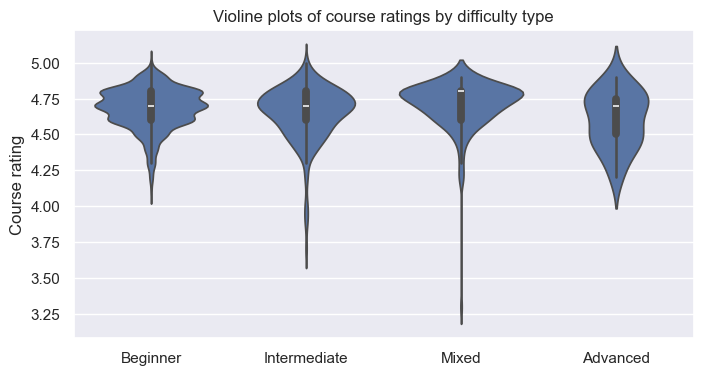

In [129]:
fig = plt.figure(figsize=(8,4)) 
ax = fig.gca() 
sns.set_style("whitegrid")
sns.violinplot(x = 'course_difficulty', y = 'course_rating', data = df, ax = ax)
ax.set_title('Violine plots of course ratings by difficulty type') 
ax.set_ylabel('Course rating')
plt.xlabel('')

Courses at advance and intermediate level rated lower than mean rating, while mixed level course have the highest average rating 4.71. At the same time mixed courses have the widest variability in ratings. In general, students rated slightly lower than courses for beginners.

### Students by certificate type

In [ ]:
students_by_certificate = df.groupby('course_Certificate_type')['course_students_enrolled'].sum().sort_values()
total_students_cert = students_by_certificate.sum()
percentage_of_total_cert = students_by_certificate / total_students_cert * 100
students_with_percentage = students_by_certificate.to_frame(name='Total Students')
students_with_percentage['Percentage of Total'] = percentage_of_total_cert.apply(lambda x: f"{x:.2f}%")
students_with_percentage['Total Students'] = students_with_percentage['Total Students'].apply(lambda x: f"{x / 1e6:.2f} million")
print("Number of students by certificate type:")
print(students_with_percentage)

Number of students by certificate type:
                         Total Students Percentage of Total
course_Certificate_type                                    
PROFESSIONAL CERTIFICATE   2.29 million               2.84%
SPECIALIZATION            27.26 million              33.79%
COURSE                    51.13 million              63.37%


Over 51 millions of students chose the course based on 'course' certificate type. Professional certificate recevied only 2.84% of students. Over on third of students received certification in specialization (almost 27.3m). 

#### Course rating at the level of certificate type

In [130]:
avg_rating_by_type = df.groupby('course_Certificate_type')['course_rating'].mean().sort_values()
avg_rating_by_type = avg_rating_by_type.apply(lambda x: f"{x:.2f}")
print("Average rating by certificate type:")
print(avg_rating_by_type)

Average rating by certificate type:
course_Certificate_type
SPECIALIZATION              4.62
PROFESSIONAL CERTIFICATE    4.70
COURSE                      4.71
Name: course_rating, dtype: object


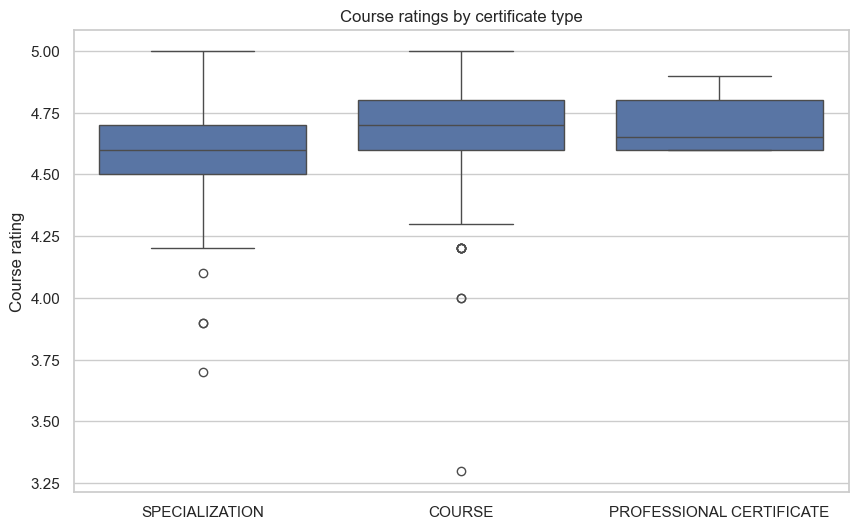

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(x='course_Certificate_type', y='course_rating', data=df)
plt.title("Course ratings by certificate type")
plt.xlabel('')
plt.ylabel("Course rating")
plt.show()

Om average course type rated higher among others but very close to professional certificate 4.7.

Course difficulty by certificate type

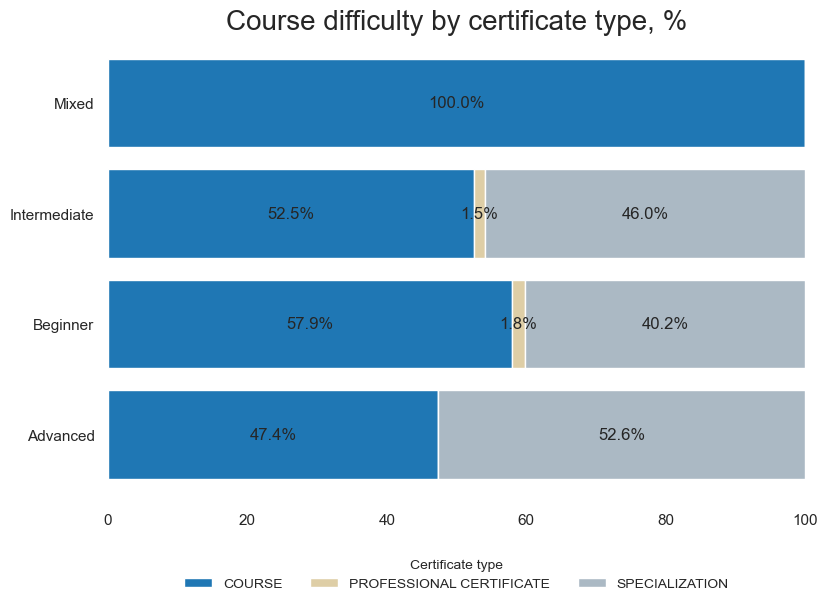

In [165]:
difficulty_cert_type = df.groupby(['course_difficulty', 'course_Certificate_type']).size().unstack(fill_value=0)
difficulty_cert_type_percentage = difficulty_cert_type.div(difficulty_cert_type.sum(axis=1), axis=0) * 100
colors = ['#1F77B4', '#decea6', '#abb9c4']  
fig, ax = plt.subplots(figsize=(9, 6) )


# Plot each level of the stack
for i, cert_type in enumerate(difficulty_cert_type_percentage.columns):
    ax.barh(difficulty_cert_type_percentage.index, difficulty_cert_type_percentage[cert_type], 
            left=difficulty_cert_type_percentage.iloc[:, :i].sum(axis=1), label=cert_type,  color=colors[i])

# Adding labels in the center of each bar segment
for index, row in difficulty_cert_type_percentage.iterrows():
    cumulative_sum = 0
    for i, (cert_type, value) in enumerate(row.items()):
        if value > 0: 
            cumulative_sum += value / 2
            ax.text(cumulative_sum, index, f'{value:.1f}%', ha='center', va='center')
            cumulative_sum += value / 2

ax.set_title('Course difficulty by certificate type, %', fontsize=20)
ax.set_xlabel(' ')
legend = ax.legend(title='Certificate type', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=10, title_fontsize=10)
legend.get_frame().set_linewidth(0)  # Remove the legend frame
ax.grid(False)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.show() 

Beginner and Intermediate courses provide a range of certifications with the majority to "course" type (57.9% and 52.5%). Courses with mixed difficulty provide only the "course" type of certification. Advanced-level courses don't provide professional certificates, aiming at a specialization 52.6% out of all courses.

### Relationship between students enrolled and course rating

<Axes: xlabel='course_rating', ylabel='course_students_enrolled'>

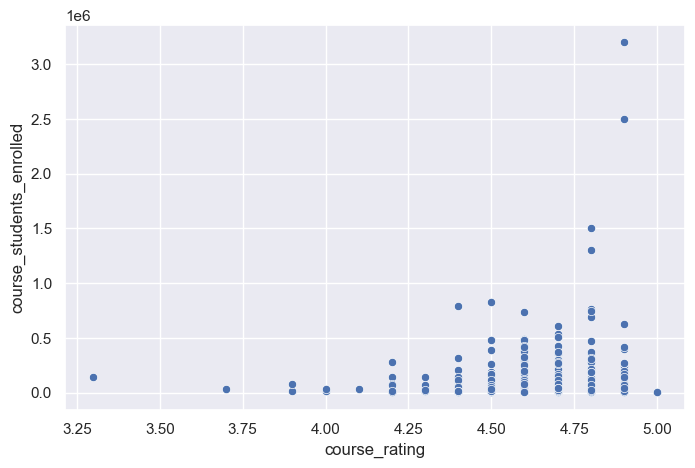

In [ ]:
sns.scatterplot(x=df['course_rating'], y=df['course_students_enrolled'])

Students enrolled vs. Course rating by difficulty level

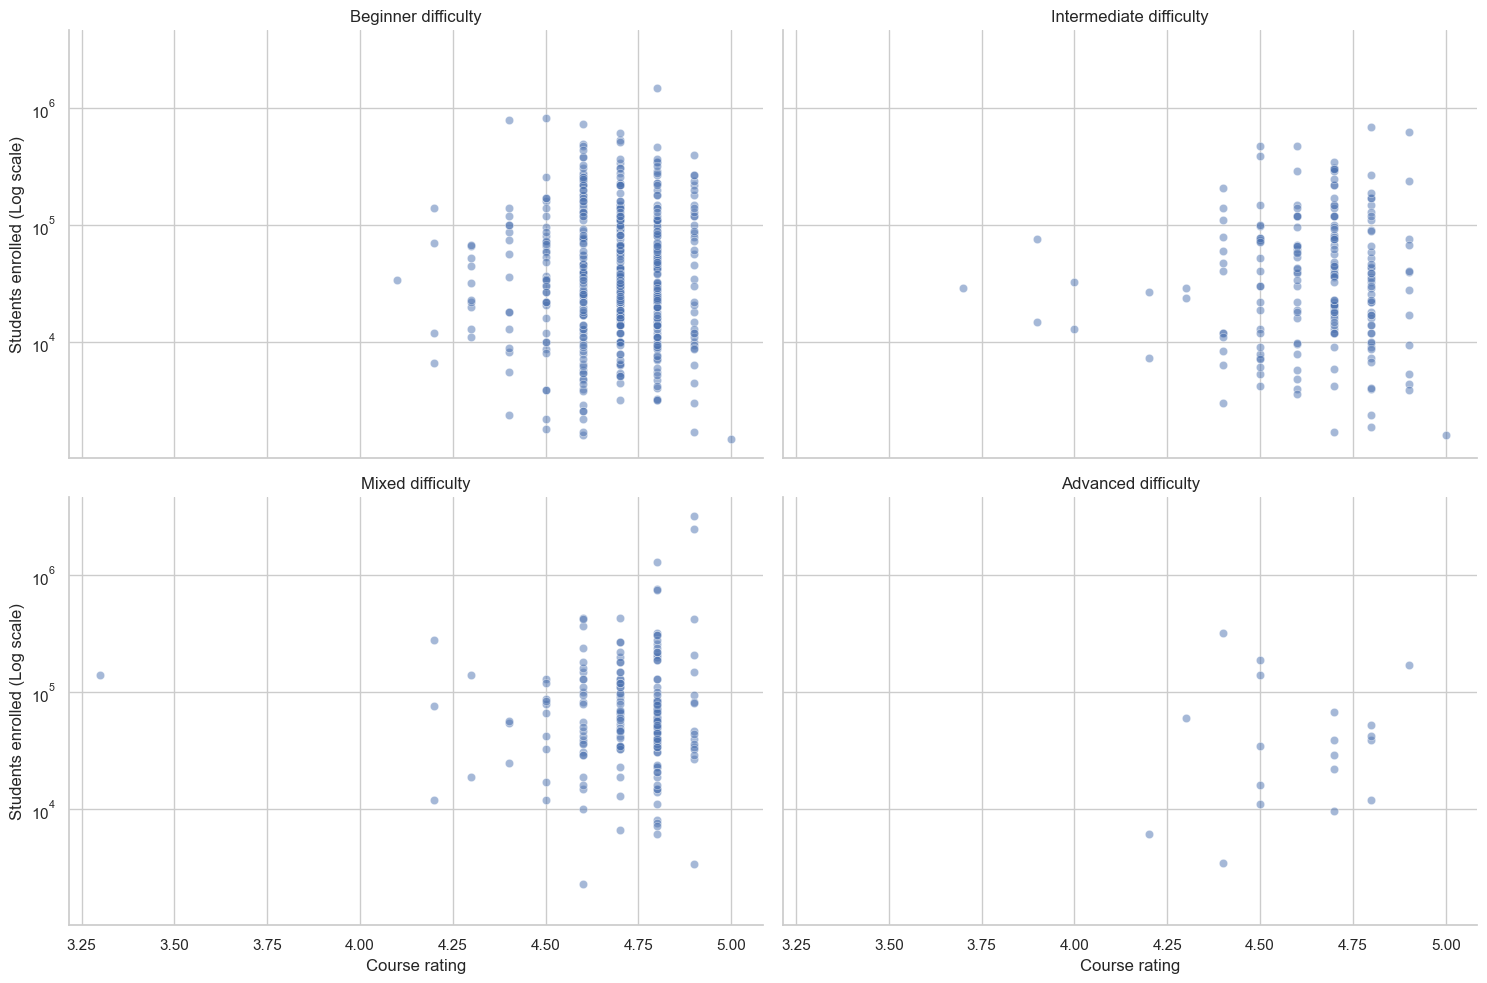

In [137]:
g = sns.FacetGrid(df, col="course_difficulty", col_wrap=2, height=5, aspect=1.5)
g.map(sns.scatterplot, 'course_rating', 'course_students_enrolled', alpha=0.5)
for ax in g.axes.flat:
    ax.set_yscale('log')
g.set_titles(col_template="{col_name} difficulty")
g.set_axis_labels("Course rating", "Students enrolled (Log scale)")
plt.show()

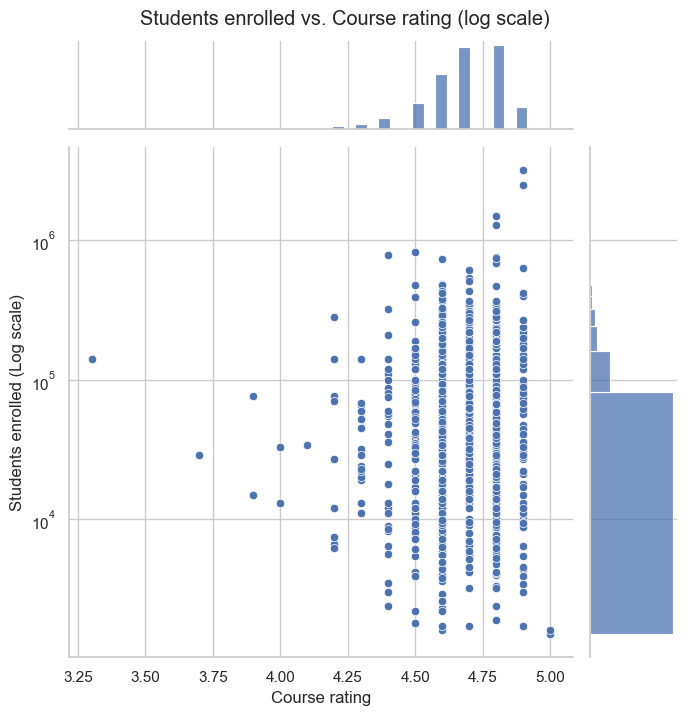

In [139]:
sns.jointplot(x='course_rating', y='course_students_enrolled', data=df, kind='scatter', height=7, marginal_kws=dict(bins=40, fill=True))
plt.yscale('log')
plt.suptitle("Students enrolled vs. Course rating (log scale)", y=1.02)
plt.xlabel("Course rating")
plt.ylabel("Students enrolled (Log scale)")
plt.show()


### Correlation analysis between numeric columns

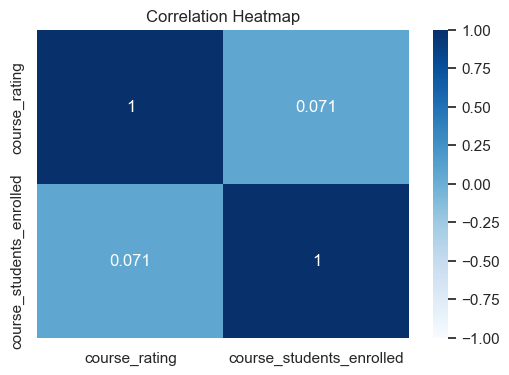

In [184]:
plt.figure(figsize=(6,4))
corr = df[['course_rating', 'course_students_enrolled']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

There are no correlation between course rating and number of students enrolled.

### Top 10 organizations by number of courses

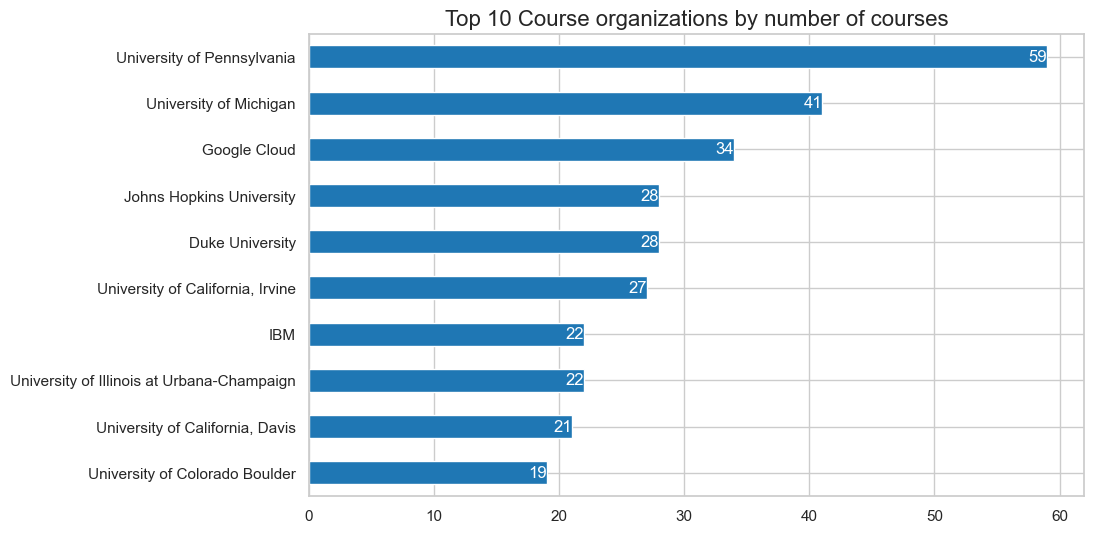

In [163]:
top_10_organizations = df['course_organization'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_10_organizations.plot(kind='barh', color='#1f77b4')
plt.title("Top 10 Course organizations by number of courses", fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.gca().invert_yaxis() 
for index, value in enumerate(top_10_organizations):
    plt.text(value, index, f'{int(value)}', va='center', ha='right', fontsize=12, color='white')
plt.show()

The University of Pennsylvania leads with 59 courses on Coursera, followed by the University of Michigan with 41 courses. Google Cloud also has a notable presence, offering 34 courses on the platform

### Top 10 organizations by number of students

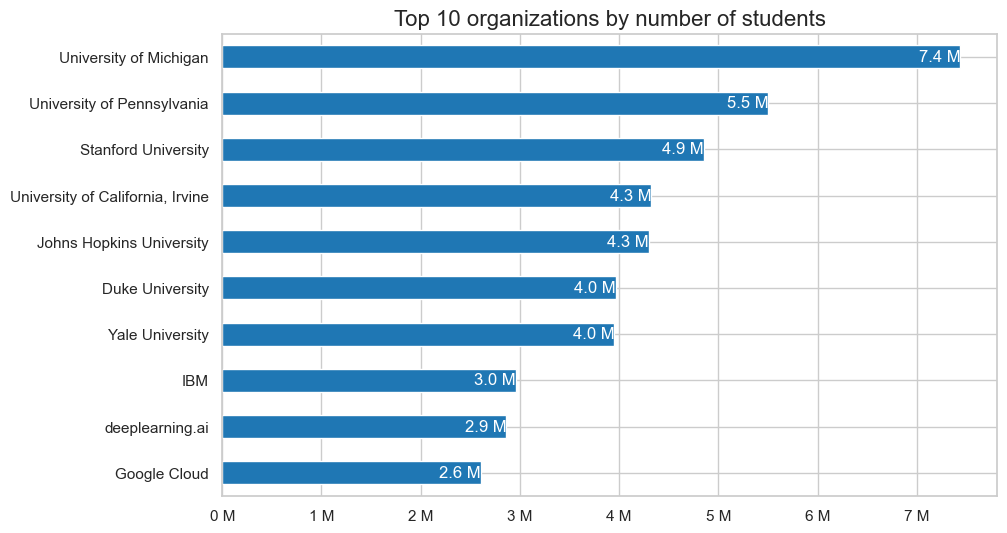

In [162]:
top_10_organizations_by_students = df.groupby('course_organization')['course_students_enrolled'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_organizations_by_students.plot(kind='barh', color='#1f77b4')
plt.title("Top 10 organizations by number of students", fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values on top
formatter = FuncFormatter(lambda x, _: f'{int(x/1000000)} M')
plt.gca().xaxis.set_major_formatter(formatter)
for index, value in enumerate(top_10_organizations_by_students):
    plt.text(value, index, f'{value/1000000:.1f} M', va='center', ha='right', fontsize=12, color='white')
    
plt.show()

The University of Michigan and the University of Pennsylvania attract the highest number of students on Coursera, with 7.4 million and 5.5 million enrollments respectively

### The highest rated organizatons that offer at least 5 courses 

In [152]:
avg_ratings = df.groupby('course_organization')['course_rating'].mean()
num_courses = df.groupby('course_organization')['course_title'].count()
ratings_and_counts = pd.DataFrame({
    'average_rating': avg_ratings,
    'num_courses': num_courses
})
filtered_organizations = ratings_and_counts[ratings_and_counts['num_courses'] >= 5]
top_filtered_organizations = filtered_organizations.nlargest(10, 'average_rating')
print(top_filtered_organizations)

                          average_rating  num_courses
course_organization                                  
Universidad de los Andes        4.820000            5
Yale University                 4.817647           17
Berklee College of Music        4.807143           14
Macquarie University            4.800000            9
The Museum of Modern Art        4.783333            6
Arizona State University        4.771429            7
Stanford University             4.768750           16
Universiteit Leiden             4.766667            9
Columbia University             4.757143            7
Università Bocconi              4.757143            7


Among organizations offering at least five courses on Coursera, Universidad de los Andes, Yale University, Berklee College of Music, and Macquarie University stand out with average ratings exceeding 4.8, making them the most highly appreciated by learners. Standford and Yale University are the only ones that represented in top 10 by popularity from both quantity of students and quality of materials.

In [193]:
top_courses_by_rating = df.sort_values(by='course_rating', ascending=False).head(5)
top_courses_by_rating

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500.0
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600.0
754,Stories of Infection,Stanford University,COURSE,4.9,Intermediate,28000.0
290,Everyday Parenting: The ABCs of Child Rearing,Yale University,COURSE,4.9,Beginner,86000.0
98,Boosting Creativity for Innovation,HEC Paris,COURSE,4.9,Beginner,9500.0


There are only 2 courses rated the highest grade, but they have relatively small number of students (below 2000). In this case, better to evaluate the courses with at least 4.9 overal rating and more than mean number of students of 90552 students. 

In [196]:
filtered_top_df = df[(df['course_rating'] >= 4.9) & (df['course_students_enrolled'] > 90552)]
top_courses_filtered_by_rating = filtered_top_df.sort_values(by='course_rating', ascending=False)
top_courses_filtered_by_rating

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
61,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,COURSE,4.9,Beginner,180000.0
65,Arizona State University TESOL,Arizona State University,PROFESSIONAL CERTIFICATE,4.9,Beginner,150000.0
842,Understanding the Brain: The Neurobiology of E...,The University of Chicago,COURSE,4.9,Beginner,130000.0
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
780,"TESOL Certificate, Part 1: Teach English Now!",Arizona State University,SPECIALIZATION,4.9,Beginner,100000.0
684,Python Data Structures,University of Michigan,COURSE,4.9,Mixed,420000.0
626,Neural Networks and Deep Learning,deeplearning.ai,COURSE,4.9,Intermediate,630000.0
600,Medical Neuroscience,Duke University,COURSE,4.9,Advanced,170000.0
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
556,Learn to Speak Korean 1,Yonsei University,COURSE,4.9,Beginner,120000.0


There are 22 courses that considered as highly popular and top ratedby students. Most of them provide course certification at the beginner level.

### The most popular courses by students enrolled

In [143]:
top_courses = df.sort_values(by='course_students_enrolled', ascending=False).head(10)

# Format the 'course_students_enrolled' to 'x.xxM' format
top_courses['formatted_students_enrolled'] = top_courses['course_students_enrolled'].apply(
    lambda x: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e6:.2f}M'  
)
fig = px.bar(top_courses, 
             x='course_students_enrolled', 
             orientation='h',
             y='course_title',
             text='formatted_students_enrolled',
             color_discrete_sequence=['#1F77B4'])  

fig.update_layout(
    title={
        'text': "Top 10 courses by number of students",
        'y':0.95,  
        'x':0.5,   
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 22}  
    },
    xaxis_title=None, 
    yaxis_title=None,
    yaxis_categoryorder='total ascending',
    width=1000,
    height=600,
    showlegend=False  
)

fig.update_xaxes(
    tickvals=[0.5e6, 1e6, 1.5e6, 2e6, 2.5e6, 3e6, 3.5e6],
    ticktext=["0.5M", "1M", "1.5M", "2M", "2.5M", "3M", "3.5M"]
)
fig.show()

The course on Machine Learning attracted the highest number of students, exceeding 3.2 million enrollments. Among the top 10 courses by student enrollment, two are focused on Python and four are dedicated to various data science topics, highlighting the significant interest and demand for these subjects among learners.

### Organizations with lowest rating (at least 5 courses)

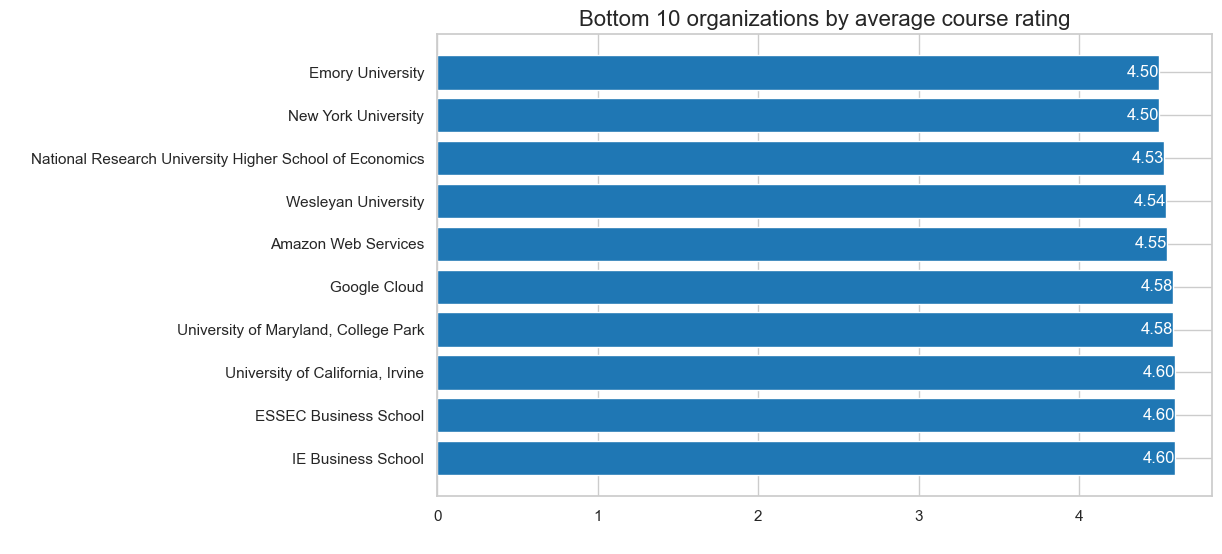

In [ ]:
bottom_5_organizations = filtered_organizations.nsmallest(10, 'average_rating')
plt.figure(figsize=(10, 6))
plt.barh(bottom_5_organizations.index, bottom_5_organizations['average_rating'], color='#1f77b4')
for index, value in enumerate(bottom_5_organizations['average_rating']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='right', fontsize=12, color='white')
plt.title("Bottom 10 organizations by average course rating", fontsize=16)
plt.xlabel(' ')
plt.ylabel(' ')
plt.gca().invert_yaxis()  
plt.show()

The least appreciated organizations are Emory University and New York university with overall rating 4.5. Bottom 10 organizations should work on improvement of their course materials and overall students' satisfaction.

In [ ]:
bottom_courses = df.sort_values(by='course_rating', ascending=True).head(5)
bottom_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
413,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000.0
566,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29000.0
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76000.0
569,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15000.0
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13000.0


3 out of 5 least rated courses are related to machine learning.

# Conclusions

- Coursera provides 891 courses with average rating of 4.68. In total 80.7 million students have been enrolled into studies.
- More than half (54.7%) of courses are designed for beginners, while 49.5% of students choose beginner courses.
- 63.4% of students have selected 'course' certicicate. Advanced-level course mostly aimed at providing specialization certicicate (52.6%).
- There is  no relationship between number of students  enrolled in a course and the course rating.
- The University of Pennsylvania provides the most courses on Coursera(59). University of Michigan has the largest students population (7.4m). Universidad de los Andesprovide the top rated courses with average rating above 4.8. Standford and Yale University are the only organizations that represented in top 10 by popularity from both quantity of students and quality of materials. Emory University and New York university has the lowest overall rating 4.5.
- Data science related course are really popular within students 6 out of 10 top courses by enrolled students. At the same time the least rated courses are also related to data science.

# Areas of improvement

- Time frame of data is not specified
- Estimations without outliers would demonstrate different results
- Future research should be aimed at comparison with other study platforms
- Detailed data on ratings  would help to understand what makes the course successfull and how to improve least rated courses